### Инструкция по выполнению проекта:

Вы - маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несколько прошлых месяцев ваш бизнес постоянно нес убытки - в привлечение пользователей была вложена куча денег, а толку никакого. Вам нужно разобраться в причинах этой ситуации.

У вас в распоряжении есть лог сервера с данными о посещениях приложения новыми пользователями, зарегистрировавшимися в период с 2019-05-01 по 2019-10-27, выгрузка их покупок за этот период, а также статистика рекламных расходов. Вам предстоит изучить, как люди пользуются продуктом, когда они начинают покупать, сколько денег приносит каждый клиент, когда он окупается и какие факторы отрицательно влияют на привлечение пользователей.

#### Шаг 1. Загрузите данные и подготовьте их к анализу
Загрузите данные о визитах, заказах и расходах в переменные. Оптимизируйте данные для анализа. Убедитесь, что тип данных в каждой колонке — правильный. Путь к файлам:

 -   /datasets/visits_info_short.csv. Скачать датасет
 -   /datasets/orders_info_short.csv. Скачать датасет
 -   /datasets/costs_info_short.csv. Скачать датасет
 
#### Шаг 2. Задайте функции для расчета и анализа LTV, ROI, удержания и конверсии

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

#### Шаг 3. Проведите исследовательский анализ данных

Постройте профили пользователей. Определите минимальную и максимальную дату привлечения пользователей.

Выясните:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?.

#### Шаг 4. Маркетинг
Выясните:

- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

#### Шаг 5. Оцените окупаемость рекламы для привлечения пользователей

С помощью LTV и ROI:
- Проанализируйте общую окупаемость рекламы;
- Проанализируйте окупаемость рекламы с разбивкой по устройствам;
- Проанализируйте окупаемость рекламы с разбивкой по странам;
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам.

Опишите проблемы, которые вы обнаружили. Ответьте на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Опишите возможные причины обнаруженных проблем и сформируйте рекомендации для рекламного отдела. При решении этого шага считайте, что вы смотрите данные 1-го ноября 2019 года и что в вашей организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

Подумайте, нужно ли включать в анализ органических пользователей?

#### Шаг 6. Напишите выводы
- Выделите причины неэффективности привлечения пользователей;
- Сформируйте рекомендации для отдела маркетинга для повышения эффективности.

#### Оформление: 
Задание выполните в Jupyter Notebook. Программный код заполните в ячейках типа code, текстовые пояснения — в ячейках типа markdown. Примените форматирование и заголовки.


#### Описание данных
Таблица visits_log_short (лог сервера с информацией о посещениях сайта):

    User Id — уникальный идентификатор пользователя
    Device — категория устройства пользователя
    Session start — дата и время начала сессии
    Session End — дата и время окончания сессии
    Channel — идентификатор рекламного источника, из которого пришел пользователь
    Region - страна пользователя

Таблица orders_log_short (информация о заказах):

    User Id — уникальный id пользователя, который сделал заказ
    Event Dt — дата и время покупки
    Revenue — выручка

Таблица costs_short (информация о затратах на маркетинг):

    Channel — идентификатор рекламного источника
    Dt — дата
    Costs — затраты на этот рекламный источник в этот день

# Шаг 1. Загрузите данные и подготовьте их к анализу
Загрузите данные о визитах, заказах и расходах в переменные. Оптимизируйте данные для анализа. Убедитесь, что тип данных в каждой колонке — правильный. Путь к файлам:

 -   /datasets/visits_info_short.csv. 
 -   /datasets/orders_info_short.csv. 
 -   /datasets/costs_info_short.csv.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')

In [3]:
visits.columns = [x.lower().replace(' ', '_') for x in visits.columns.values]
orders.columns = [x.lower().replace(' ', '_') for x in orders.columns.values]
costs.columns = [x.lower().replace(' ', '_') for x in costs.columns.values]

In [4]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 

In [5]:
visits.head()


,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [6]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [8]:
visits.duplicated().sum()

0

In [7]:

visits.columns.to_list()

['user_id', 'region', 'device', 'channel', 'session_start', 'session_end']

In [8]:
visits.columns = ['user_id', 'region', 'device', 'channel', 'session_start', 'session_end']

In [9]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])


In [12]:
visits['duration'] = (visits['session_end'] - visits['session_start']).dt.seconds
visits.sort_values(by='duration')

,user_id,region,device,channel,session_start,session_end,duration
64722,435512207837,United States,Android,organic,2019-07-04 10:00:51,2019-07-04 10:00:51,0
12905,919840622507,United States,iPhone,organic,2019-05-14 01:54:46,2019-05-14 01:54:46,0
218387,772808741431,Germany,iPhone,OppleCreativeMedia,2019-05-23 21:01:06,2019-05-23 21:01:06,0
252523,708831737703,Germany,iPhone,organic,2019-07-30 20:57:55,2019-07-30 20:57:55,0
190003,111394931289,United States,iPhone,TipTop,2019-10-17 14:13:26,2019-10-17 14:13:26,0
...,...,...,...,...,...,...,...
60721,14446585295,United States,iPhone,TipTop,2019-07-01 13:45:35,2019-07-01 19:09:40,19445
125273,756059349656,United States,iPhone,FaceBoom,2019-08-28 20:34:33,2019-08-29 02:01:09,19596
218941,123964463828,UK,Android,WahooNetBanner,2019-05-24 16:16:36,2019-05-24 21:43:53,19637
49192,485412247357,United States,Android,FaceBoom,2019-06-21 04:11:31,2019-06-21 09:47:12,20141


In [12]:
orders.head()

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [13]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


In [14]:
orders.duplicated().sum()

0

In [10]:
orders.columns.to_list()

['user_id', 'event_dt', 'revenue']

In [11]:
orders.columns = ['user_id', 'event_dt', 'revenue']

In [12]:
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

In [13]:
orders.sort_values(by='revenue')

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
26519,560333885939,2019-10-24 04:03:26,4.99
26520,52009555290,2019-10-24 20:08:58,4.99
26521,66337586950,2019-10-24 20:57:03,4.99
26522,803809640734,2019-10-24 10:49:53,4.99
...,...,...,...
36604,464296290883,2019-09-25 08:49:24,49.99
6888,97310322486,2019-07-09 10:39:57,49.99
22023,903005757588,2019-10-04 09:10:21,49.99
39550,968421663220,2019-10-25 05:00:33,49.99


In [14]:
orders.tail()

,user_id,event_dt,revenue
40207,651604369137,2019-10-31 16:19:07,4.99
40208,275341387049,2019-10-31 01:17:17,4.99
40209,374656616484,2019-10-31 06:17:29,4.99
40210,168548862926,2019-10-31 22:46:19,4.99
40211,329994900775,2019-10-31 13:29:06,4.99


In [15]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


In [16]:
costs.head()

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [17]:
costs.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [18]:
costs.duplicated().sum()

0

In [19]:
costs.columns.to_list()

['dt', 'channel', 'costs']

In [20]:
costs.columns = ['dt', 'channel', 'costs']

In [21]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [22]:
costs.tail()

,dt,channel,costs
1795,2019-10-23,lambdaMediaAds,4.0
1796,2019-10-24,lambdaMediaAds,6.4
1797,2019-10-25,lambdaMediaAds,8.8
1798,2019-10-26,lambdaMediaAds,8.8
1799,2019-10-27,lambdaMediaAds,12.0


In [23]:
costs.sort_values(by='costs')

,dt,channel,costs
1656,2019-06-06,lambdaMediaAds,0.80
762,2019-06-12,YRabbit,1.26
795,2019-07-15,YRabbit,1.26
763,2019-06-13,YRabbit,1.44
1725,2019-08-14,lambdaMediaAds,1.60
...,...,...,...
689,2019-09-27,TipTop,602.00
691,2019-09-29,TipTop,605.50
684,2019-09-22,TipTop,616.00
690,2019-09-28,TipTop,623.00


In [50]:
orders['revenue'].describe()

count    40212.000000
mean         5.370608
std          3.454208
min          4.990000
25%          4.990000
50%          4.990000
75%          4.990000
max         49.990000
Name: revenue, dtype: float64

In [25]:
costs['costs'].describe()

count    1800.000000
mean       58.609611
std       107.740223
min         0.800000
25%         6.495000
50%        12.285000
75%        33.600000
max       630.000000
Name: costs, dtype: float64

Шаг 2. Задайте функции для расчета и анализа LTV, ROI, удержания и конверсии

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

In [26]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, costs):
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

profiles = get_profiles(visits, orders, costs)
profiles.sort_values(by='acquisition_cost', ascending=False)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
146333,975864617797,2019-10-11 08:08:04,TipTop,iPhone,United States,2019-10-11,2019-10-01,False,3.715385
98769,658088125802,2019-10-11 01:59:19,TipTop,iPhone,United States,2019-10-11,2019-10-01,True,3.715385
60726,402874163955,2019-10-11 01:25:37,TipTop,Mac,United States,2019-10-11,2019-10-01,False,3.715385
107727,717904110722,2019-10-11 23:31:06,TipTop,PC,United States,2019-10-11,2019-10-01,False,3.715385
11119,73808119380,2019-10-11 00:23:14,TipTop,Mac,United States,2019-10-11,2019-10-01,False,3.715385
...,...,...,...,...,...,...,...,...,...
72616,481952876872,2019-05-21 16:47:08,organic,Mac,UK,2019-05-21,2019-05-01,False,0.000000
72612,481939984583,2019-09-05 12:50:10,organic,iPhone,United States,2019-09-05,2019-09-01,False,0.000000
72607,481890220519,2019-05-24 13:37:56,organic,Mac,United States,2019-05-24,2019-05-01,False,0.000000
72600,481864823252,2019-05-19 21:00:47,organic,Android,France,2019-05-19,2019-05-01,False,0.000000


In [59]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    dimensions = ['payer'] + dimensions
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days
    
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result
    
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )
    return result_raw, result_grouped, result_in_time 

retention_raw, retention, retention_history = get_retention(
    profiles, visits, datetime(2019, 11, 1).date(), 14, dimensions=['device']
)

report = retention.drop(columns=['cohort_size', 0])
round(report, 3)


1      2      3      4      5      6      7      8      9   \
payer device                                                                   
False Android  0.175  0.086  0.052  0.031  0.024  0.017  0.014  0.011  0.010   
      Mac      0.179  0.086  0.049  0.033  0.024  0.020  0.015  0.013  0.009   
      PC       0.175  0.087  0.052  0.035  0.024  0.018  0.015  0.011  0.009   
      iPhone   0.178  0.087  0.053  0.035  0.026  0.019  0.014  0.012  0.010   
True  Android  0.385  0.299  0.250  0.214  0.206  0.156  0.166  0.147  0.137   
      Mac      0.365  0.284  0.203  0.197  0.172  0.148  0.143  0.137  0.132   
      PC       0.421  0.334  0.262  0.262  0.209  0.225  0.192  0.175  0.150   
      iPhone   0.370  0.277  0.234  0.194  0.185  0.158  0.144  0.136  0.132   

                  10     11     12     13  
payer device                               
False Android  0.008  0.007  0.005  0.005  
      Mac      0.008  0.006  0.006  0.004  
      PC       0.007  0.005  0.006  0.006  
      iPhone   0.007  0.007  0.006  0.004  
True  Android  0.133  0.111  0.129  0.107  
      Mac      0.121  0.115  0.109  0.111  
      PC       0.164  0.148  0.144  0.124  
      iPhone   0.132  0.121  0.107  0.092

In [27]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    first_orders = (
        orders.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )
    result_raw = result_raw.merge(
        first_orders[['user_id', 'event_dt']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result


    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    if 'cohort' in dimensions: 
        dimensions = []


    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )
    return result_raw, result_grouped, result_in_time

conversion_raw, conversion, conversion_history = get_conversion (profiles, orders, datetime(2019, 11, 1).date(), 14, 
                                                                 dimensions=['device'])


report2 = conversion.drop(columns=['cohort_size'])
round(report2, 3)

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
device,,,,,,,,,,,,,,
Android,0.041,0.047,0.050,0.051,0.053,0.054,0.055,0.055,0.056,0.056,0.057,0.057,0.057,0.057
Mac,0.044,0.051,0.054,0.056,0.057,0.058,0.059,0.059,0.060,0.061,0.061,0.061,0.061,0.062
PC,0.034,0.039,0.041,0.043,0.044,0.045,0.046,0.047,0.047,0.048,0.048,0.048,0.048,0.049
iPhone,0.043,0.049,0.052,0.054,0.056,0.057,0.057,0.058,0.059,0.059,0.059,0.060,0.060,0.060


In [51]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    result_raw = result_raw.merge(
        orders[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )
        roi = result.div(cac['cac'], axis=0)
        roi = roi[~roi['cohort_size'].isin([np.inf])]
        roi['cohort_size'] = cohort_sizes
        roi['cac'] = cac['cac']
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]
        return result, roi

    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    if 'cohort' in dimensions:
        dimensions = []

    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )
    return (
        result_raw, 
        result_grouped, 
        result_in_time, 
        roi_grouped, 
        roi_in_time,  
    ) 

ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['device']
)

report3 = ltv.drop(columns=['cohort_size'])
display(round(report3, 3))
report4 = roi.drop(columns=['cohort_size','cac'])

round(report4, 3)


,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
device,,,,,,,,,,,,,,
Android,0.339,0.431,0.500,0.555,0.608,0.661,0.700,0.739,0.774,0.807,0.834,0.856,0.888,0.912
Mac,0.382,0.480,0.550,0.605,0.651,0.686,0.722,0.753,0.791,0.825,0.857,0.884,0.905,0.931
PC,0.277,0.362,0.430,0.486,0.540,0.582,0.631,0.662,0.701,0.729,0.762,0.789,0.812,0.836
iPhone,0.368,0.456,0.524,0.583,0.632,0.674,0.711,0.750,0.780,0.812,0.840,0.867,0.894,0.917


,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
device,,,,,,,,,,,,,,
Android,0.333,0.422,0.491,0.544,0.596,0.649,0.686,0.724,0.759,0.791,0.818,0.839,0.871,0.894
Mac,0.300,0.376,0.431,0.474,0.510,0.537,0.566,0.590,0.620,0.647,0.672,0.693,0.709,0.729
PC,0.350,0.456,0.543,0.613,0.681,0.734,0.796,0.835,0.884,0.920,0.961,0.995,1.024,1.055
iPhone,0.288,0.357,0.410,0.457,0.495,0.527,0.557,0.587,0.611,0.636,0.658,0.679,0.700,0.718


Шаг 3. Проведите исследовательский анализ данных
Постройте профили пользователей. Определите минимальную и максимальную дату привлечения пользователей.

Выясните:

Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?

In [52]:
min_date = profiles['first_ts'].min()
max_date = profiles['first_ts'].max()
display(min_date)
display(max_date)

(
    profiles.groupby(['region', 'device'])
    .agg({'user_id': 'nunique', 
          'payer' : ['sum', 'mean'],
         }
        )
    .sort_values(by='region', ascending=False)
)

Timestamp('2019-05-01 00:00:41')

Timestamp('2019-10-27 23:59:04')

user_id payer          
                      nunique   sum      mean
region        device                         
United States Android   12436  1317  0.105902
              Mac       15424  1507  0.097705
              PC         6421   630  0.098116
              iPhone    27548  2654  0.096341
UK            Android    3243   173  0.053346
              Mac        1086    49  0.045120
              PC         4551   243  0.053395
              iPhone     2274   104  0.045734
Germany       Android    2849   144  0.050544
              Mac        1020    48  0.047059
              PC         3797   200  0.052673
              iPhone     1862    98  0.052632
France        Android    3313   148  0.044673
              Mac        1163    69  0.059329
              PC         4384   221  0.050411
              iPhone     2198   116  0.052775

Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
Большинство пользователей из США, платящих тоже больше. 
Больше всего платящих в США с Android и Mac. В других регионах Android тоже в лидерах, в лидерах. У Iphone низкая доля платящих

In [29]:
profiles.query('payer == True').groupby('channel').agg({'payer': 'count'}).sort_values(by='payer', ascending=False)


,payer
channel,
FaceBoom,3557
TipTop,1878
organic,1160
WahooNetBanner,453
AdNonSense,440
RocketSuperAds,352
LeapBob,262
OppleCreativeMedia,233
lambdaMediaAds,225


По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?
Каналы: Faceboom, Tiptop, organic

In [30]:
profiles.groupby('region').agg({'user_id': 'nunique', 'payer' : 'mean',}).sort_values(by='payer', ascending=False)


,user_id,payer
region,,
United States,100002,0.069019
Germany,14981,0.041119
UK,17575,0.039829
France,17450,0.037994


In [31]:
profiles.groupby('device').agg({'user_id': 'nunique','payer' : 'mean'}).sort_values(by='payer', ascending=False)


,user_id,payer
device,,
Mac,30042,0.063644
iPhone,54479,0.062079
Android,35032,0.058518
PC,30455,0.050468


In [35]:
profiles.groupby('channel').agg({'user_id': 'nunique', 'payer' : 'mean'}).sort_values(by='payer', ascending=False)


,user_id,payer
channel,,
FaceBoom,29144,0.122049
AdNonSense,3880,0.113402
lambdaMediaAds,2149,0.104700
TipTop,19561,0.096007
RocketSuperAds,4448,0.079137
WahooNetBanner,8553,0.052964
YRabbit,4312,0.038265
MediaTornado,4364,0.035747
LeapBob,8553,0.030633


Самые платящие клиенты из США, которые используют MAC и Iphone. Лучшие каналы - FaceBoom, AdNonSense, lambdaMediaAds 

Шаг 4. Маркетинг
Выясните:

Сколько денег потратили? Всего / на каждый источник / по времени
Сколько в среднем стоило привлечение одного покупателя из каждого источника?

'Общие затраты:'

105497

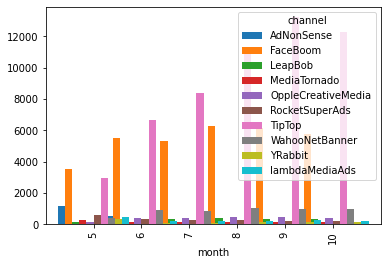

In [37]:
costs['month'] = pd.DatetimeIndex(costs['dt']).month 

display('Общие затраты:', round((costs['costs'].sum())))
costs.pivot_table(index='month', columns='channel', values='costs', aggfunc='sum').plot (kind='bar', width=1.5)

plt.show()

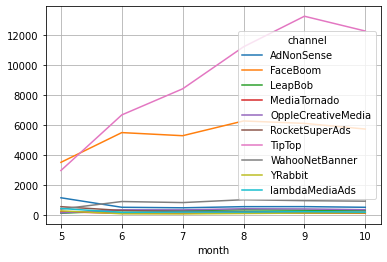

In [39]:
costs.pivot_table(index='month', columns='channel', values='costs', aggfunc='sum').plot (grid=True)


plt.show()

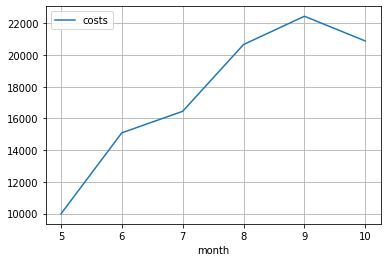

In [44]:
costs.pivot_table(index='month', values='costs', aggfunc='sum').plot (grid=True)
plt.show()

Сколько денег потратили? 

С мая по сентябрь траты на рекламу увеличились. Больше всего затрат на TipTop и FaceBoom, но и с них приходит больше всего платящих клиентов

'Cредний CAC на одного пользователя'

1.1274813239427588

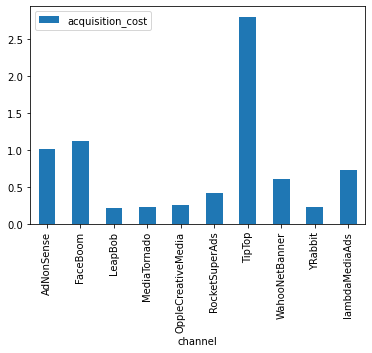

In [46]:
display('Cредний CAC на одного пользователя', profiles.query('acquisition_cost != 0')['acquisition_cost'].mean())

profiles.query('acquisition_cost != 0').pivot_table(index='channel', values='acquisition_cost', aggfunc='mean').plot (kind='bar')

plt.show()

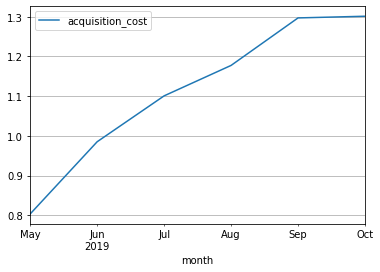

In [47]:
profiles.query('acquisition_cost != 0').pivot_table(index='month', values='acquisition_cost', aggfunc='mean').plot (grid=True)


plt.show()

Сколько в среднем стоило привлечение одного покупателя из каждого источника?

Привлечение одного покупателя, в среднем, стоило 1.127, самые дорогие пользователи из  TipTop

Шаг 5. Оцените окупаемость рекламы для привлечения пользователей
С помощью LTV и ROI:

Проанализируйте общую окупаемость рекламы;
Проанализируйте окупаемость рекламы с разбивкой по устройствам;
Проанализируйте окупаемость рекламы с разбивкой по странам;
Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам.
Опишите проблемы, которые вы обнаружили. Ответьте на вопросы:

Окупается ли реклама, направленная на привлечение пользователей в целом?
Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.
Опишите возможные причины обнаруженных проблем и сформируйте рекомендации для рекламного отдела. При решении этого шага считайте, что вы смотрите данные 1-го ноября 2019 года и что в вашей организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей

### 1  Проанализируйте общую окупаемость рекламы

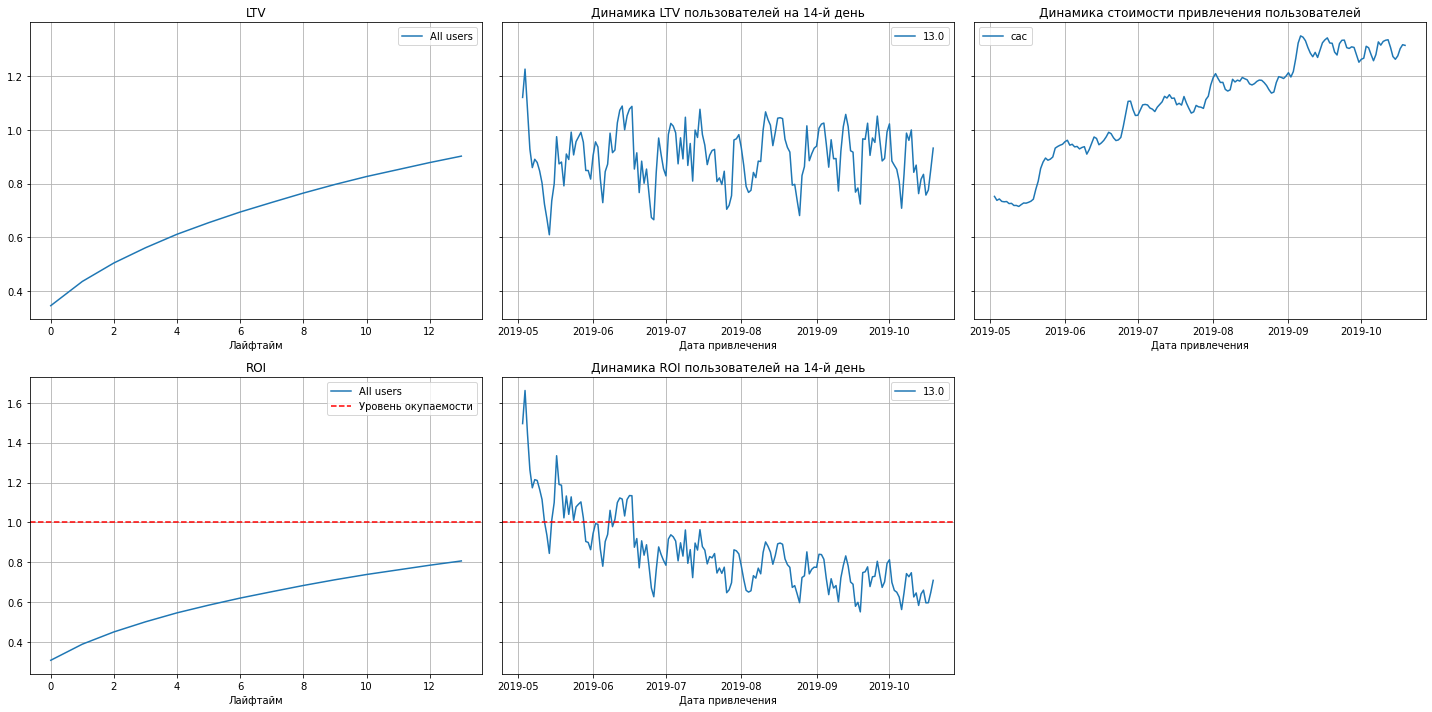

In [53]:
# постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

profiles = profiles.query('channel != "organic"')

def filter_data(df, window):
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):
    plt.figure(figsize=(20, 10))
    ltv = ltv.drop(columns=['cohort_size'])
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]
    cac_history = roi_history[['cac']]
    roi = roi.drop(columns=['cohort_size', 'cac'])
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

days_num = (max_date - min_date).days
daily_costs = []
for index, values in costs.iterrows():
    channel_name = values['channel']
    channel_costs = values['costs']
    avg_channel_costs = channel_costs / days_num
    for i in range(days_num):
        current_day = min_date + timedelta(days=i)
        daily_costs += [[current_day, channel_name, avg_channel_costs]]
daily_costs = pd.DataFrame(daily_costs, columns=['dt', 'channel', 'costs'])
daily_costs['dt'] = daily_costs['dt'].dt.date

ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, orders, datetime(2019, 11, 1).date(), 14
)

plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14, window=3)

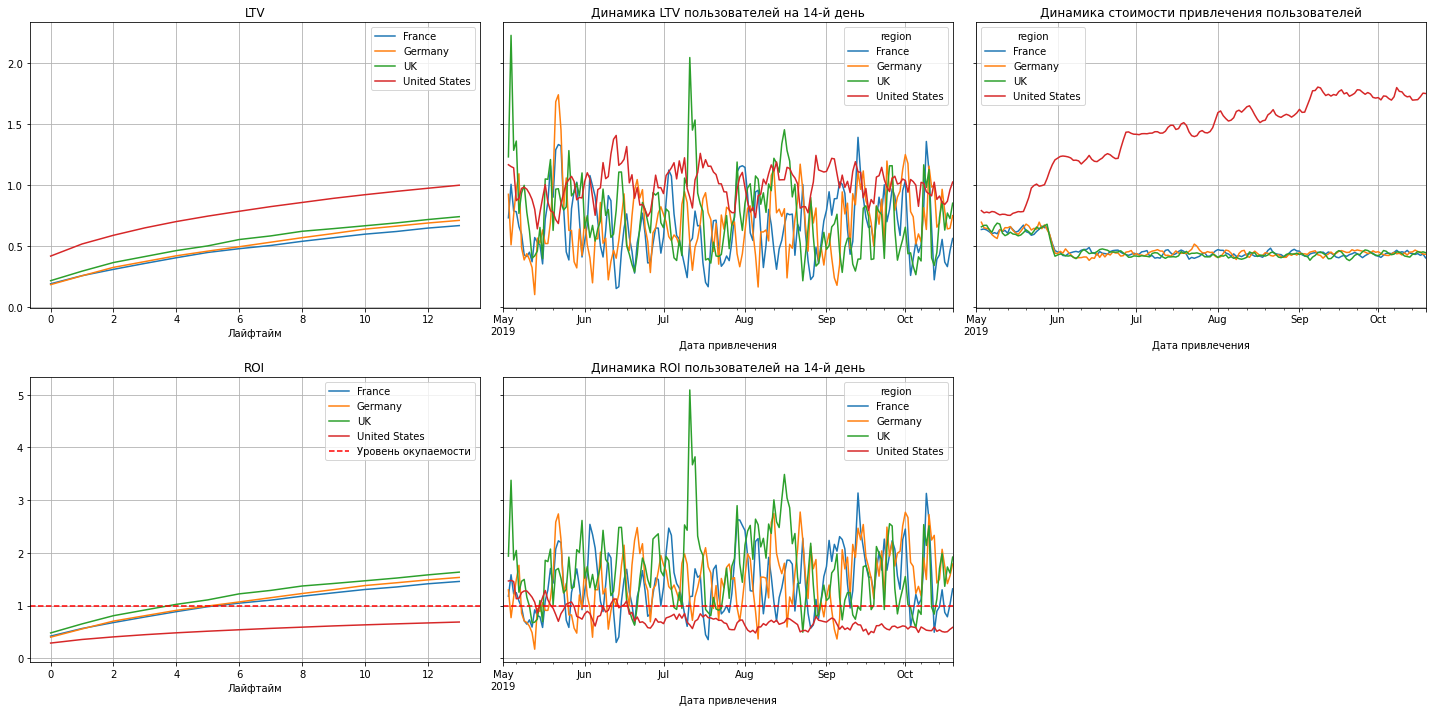

In [54]:
# проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['region']
)

plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14, window=3)

Самые окупаемые регионы UK и Germany, United States - привлекает больше клиентов

2 Проанализируйте окупаемость рекламы с разбивкой по устройствам

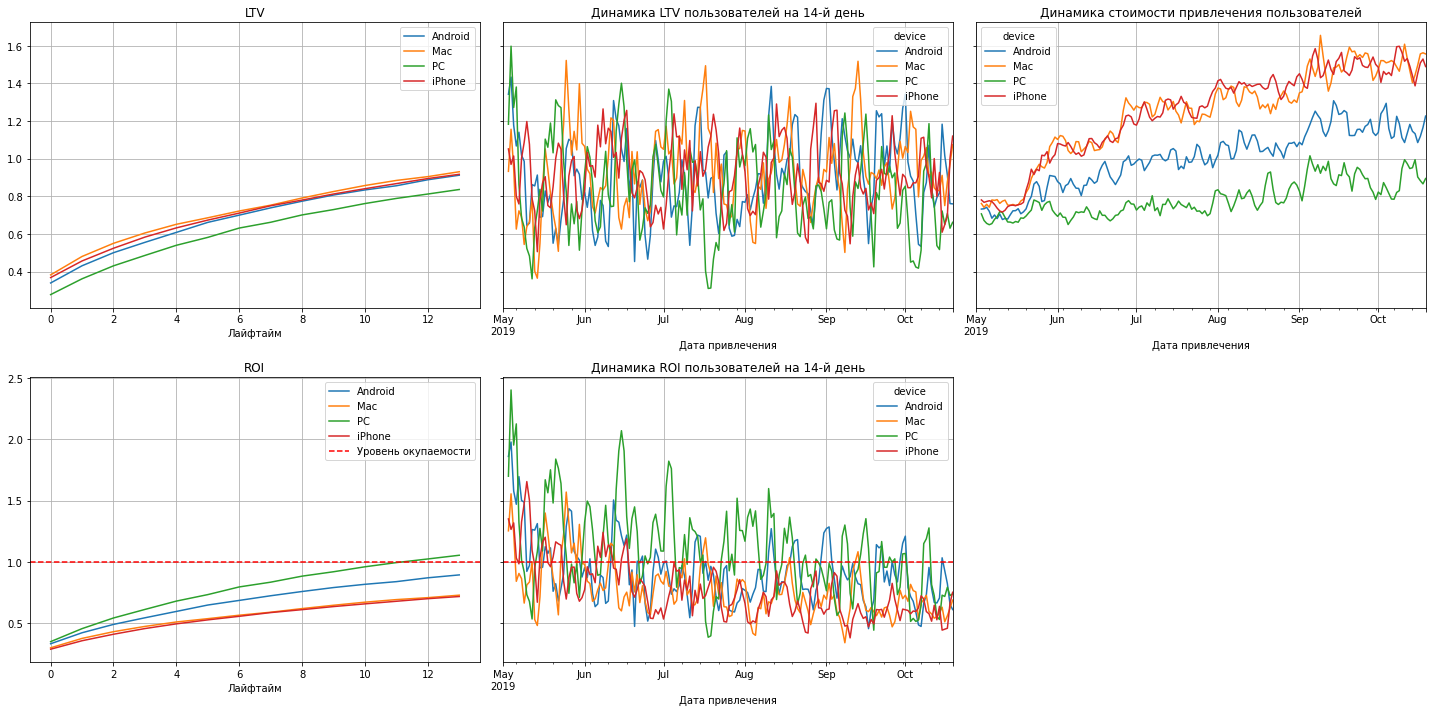

In [55]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['device'])

plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14, window=3)

Стоимость клиентов с Iphone и Mac выше каждый месяцю. По ROI - Iphone и Mac не окупаются

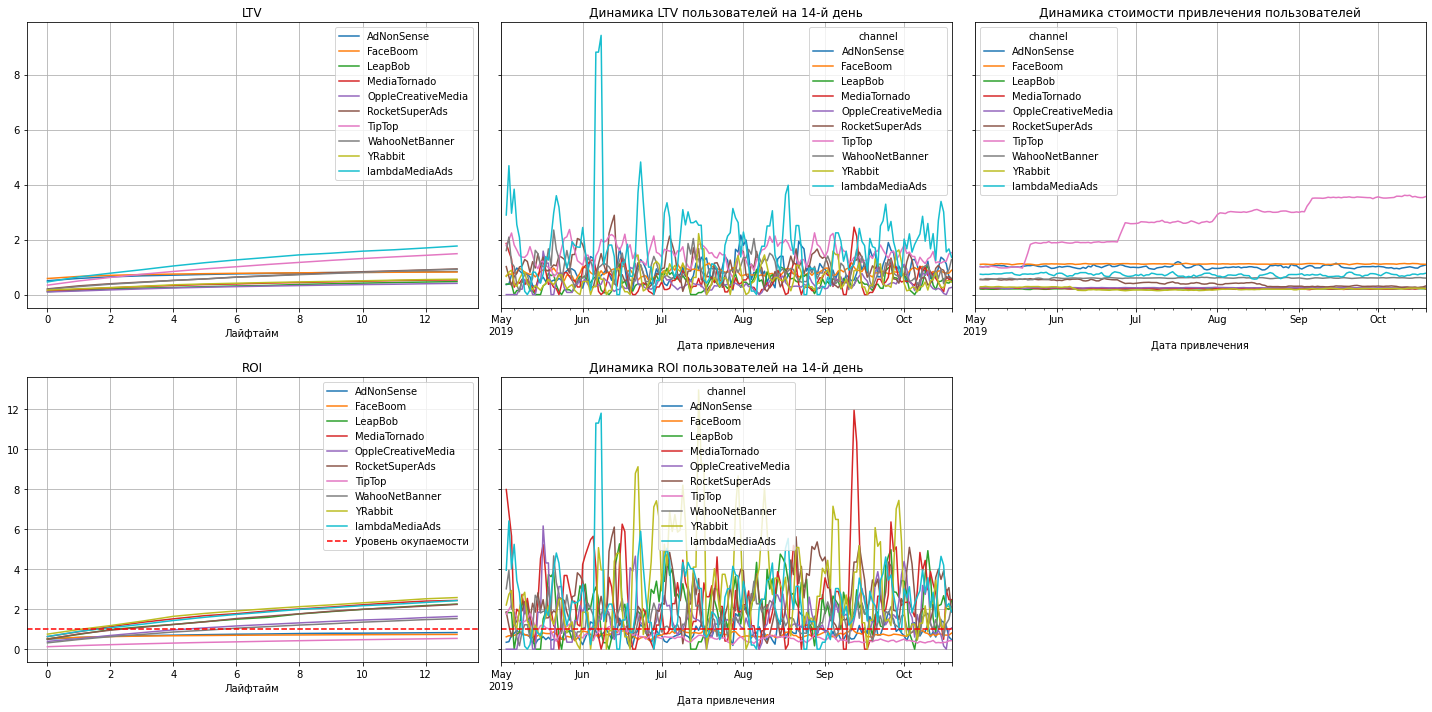

In [56]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['channel'])

plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14, window=3)

TipTop - антилидер по стоимости и находится ниже окупаемости

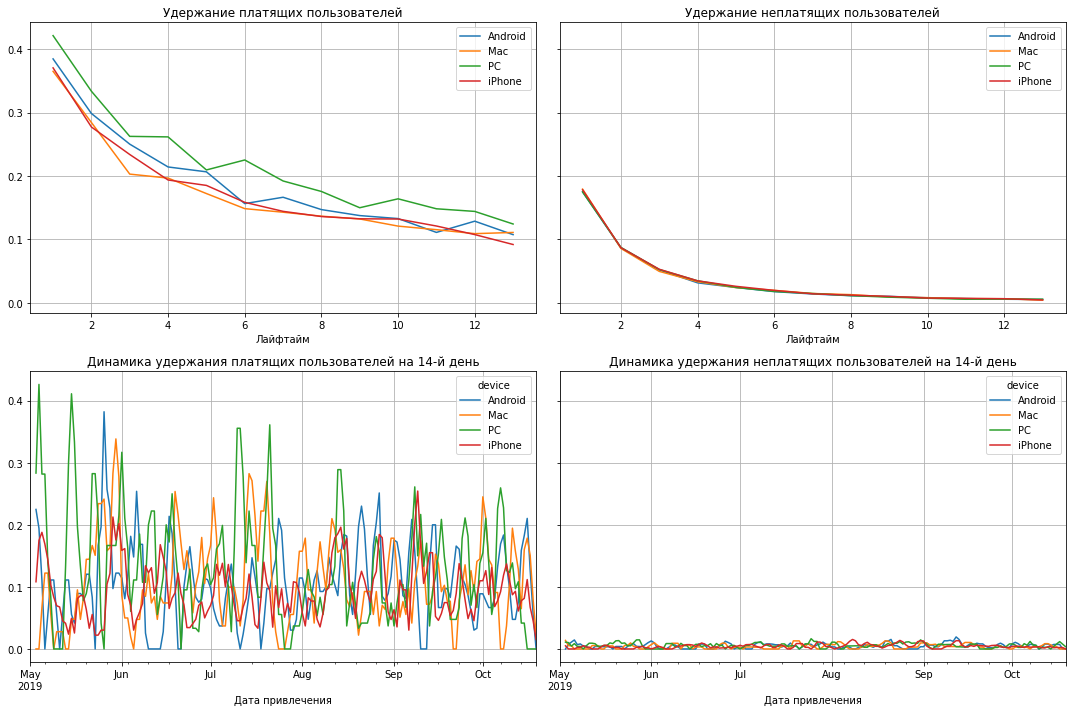

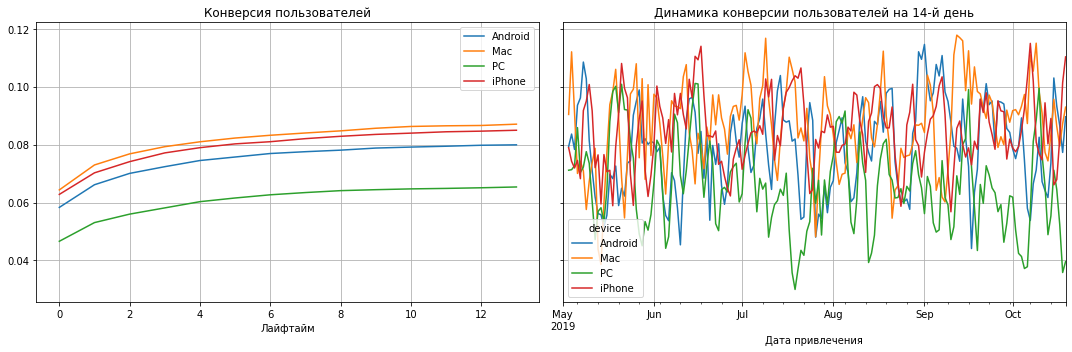

In [60]:
# постройте и изучите графики конверсии и удержания с разбивкой по устройствам

def plot_retention(retention, retention_history, horizon, window=7):
    plt.figure(figsize=(15, 10))

    retention = retention.drop(columns=['cohort_size', 0])
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    ax3 = plt.subplot(2, 2, 3)
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()
    
def plot_conversion(conversion, conversion_history, horizon, window=7):
    plt.figure(figsize=(15, 5))

    conversion = conversion.drop(columns=['cohort_size'])
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 
    
retention_raw, retention, retention_history = get_retention(
    profiles, visits, datetime(2019, 11, 1).date(), 14, dimensions=['device'])
    
conversion_raw, conversion, conversion_history = get_conversion (profiles, orders, datetime(2019, 11, 1).date(), 14, 
                                                                 dimensions=['device'])
    
plot_retention (retention, retention_history, 14, window=3)
plot_conversion (conversion, conversion_history, 14, window=3)
    

С устройства РС приходят самые качественные клиенты,с самым долгим лайфтаймом. iPhone и Мас - высокая конверсия, но в графике быстрее всех отваливаются

Проанализируйте окупаемость рекламы с разбивкой по странам

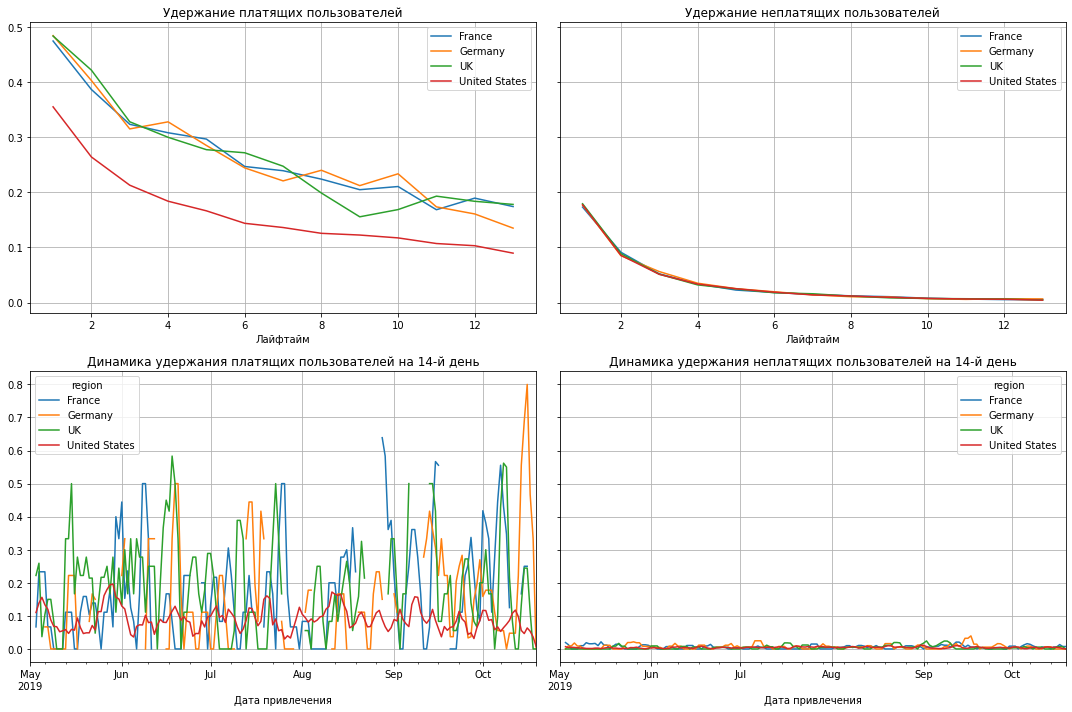

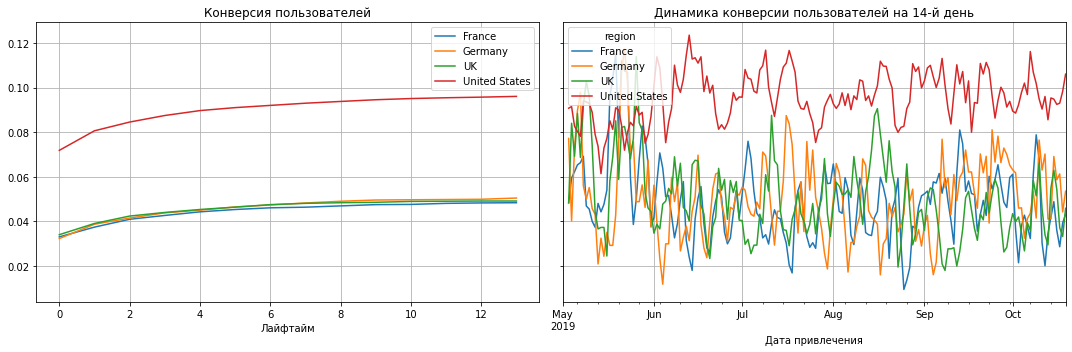

In [61]:
# постройте и изучите графики конверсии и удержания с разбивкой по странам
retention_raw, retention, retention_history = get_retention(
    profiles, visits, datetime(2019, 11, 1).date(), 14, dimensions=['region'])
    
conversion_raw, conversion, conversion_history = get_conversion (profiles, orders, datetime(2019, 11, 1).date(), 14, 
                                                                 dimensions=['region'])
    
plot_retention (retention, retention_history, 14, window=3)
plot_conversion (conversion, conversion_history, 14, window=3)

 United States в аутсайдерах,но конверсия хорошая

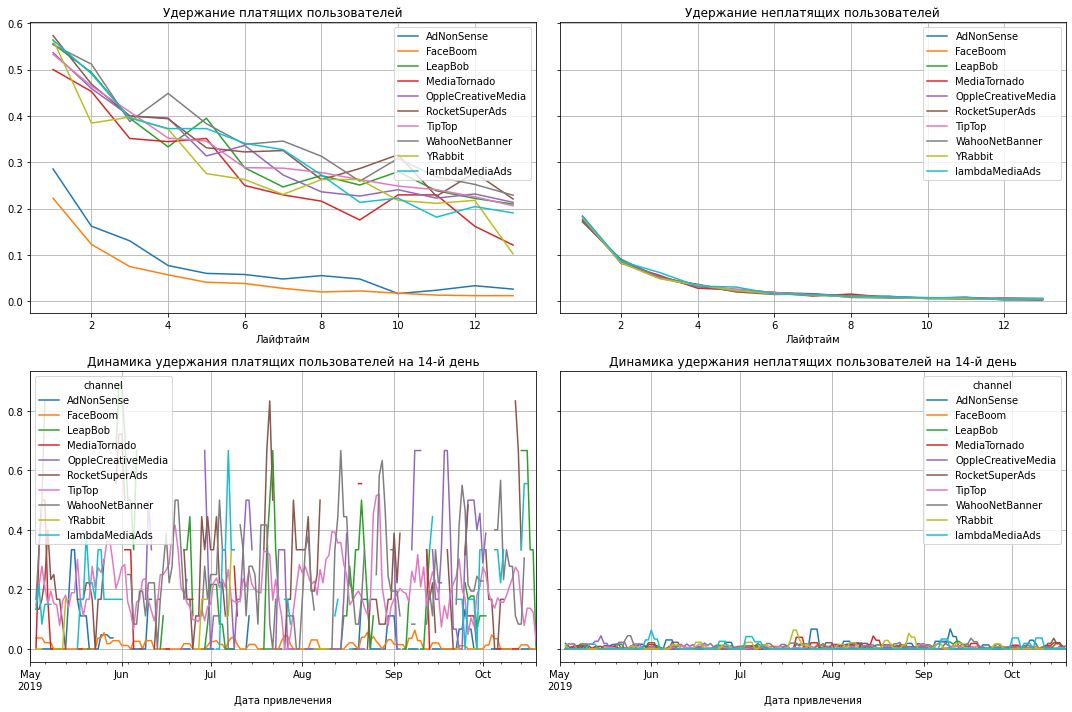

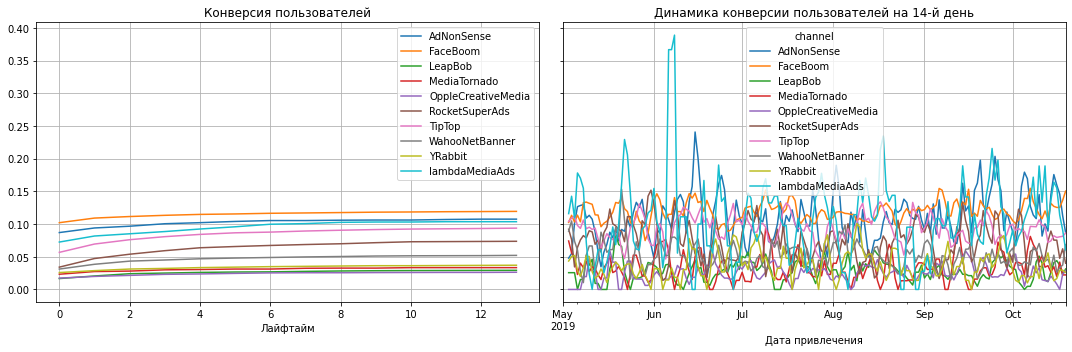

In [62]:
# постройте и изучите графики конверсии и удержания с разбивкой по каналам
retention_raw, retention, retention_history = get_retention(
    profiles, visits, datetime(2019, 11, 1).date(), 14, dimensions=['channel'])
    
conversion_raw, conversion, conversion_history = get_conversion (profiles, orders, datetime(2019, 11, 1).date(), 14, 
                                                                 dimensions=['channel'])
    
plot_retention (retention, retention_history, 14, window=3)
plot_conversion (conversion, conversion_history, 14, window=3)

с канала FaceBoom хорошая конверсия, но долго пользователи не остаются, WahooNetBanner одно из лучших соотношений цена/качество 

# Шаг 6. Напишите выводы
- Выделите причины неэффективности привлечения пользователей;
- Сформируйте рекомендации для отдела маркетинга для повышения эффективности.

Причины неэффективности:
С устройств iPhone и Mac хорошая конверсия, но удержание хуже. 
У United States убытки по всем показателям, кроме привлечения

Рекомендации:
Если брать из уроков, то всем стоит проверить работоспособность приложений, особенно iPhone и Mac.
Ну и бюджет лучше трат

2.Для все регионов - выделить бюджет на канал WahooNetBanner, lambdaMediaAds и Yrabbit, пересмотреть/проверить рекламные компании FaceBoom и TipTop, а именно проверить ожидание, которые в них озвучивают/акцию и реальность, а также на какую категорию реклама рассчитана

3.United States после отработки п1 и п2 скорей всего станет прибыльным